In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path='/mnt/d/personal/metric_tree/'
df=pd.read_csv(path+'data.csv')
df.head()

,PERIOD,SUPER CATEGORY,PRODUCT GROUP,ADVERTISER,PRODUCT,PUBLICATION,AD TYPE(CLR/BW),VOL_SQCM
0,Apr - 2018,Agriculture,Agri-corporate,Veg&Fruit Prom Council Kerala,Vegetable&Fruit Promo Coun (Kerala),PLAYER 2,Color,48
1,Apr - 2018,Alcoholic Drinks,Liquor,United Spirits Ltd,Mcdowells No1 Mineral Water,PLAYER 1,Black & White,32
2,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Car Rng(Ford India),PLAYER 2,Color,4021
3,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Car Rng(Ford India),PLAYER 1,Color,2612
4,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Freestyle,PLAYER 2,Color,6953


#### Q.1. If the market has only two media players i.e. PLAYER 1 & PLAYER 2 - do you observe any uptrend/ downtrend in the overall Advt. flow year-on year? Support your observations with data points.

In [3]:
data=df[['PUBLICATION','PERIOD','VOL_SQCM']]
data=data.groupby(['PUBLICATION','PERIOD']).sum(['VOL_SQCM']).reset_index()
data['PERIOD'] = pd.to_datetime('01-'+data['PERIOD'])
data=data.sort_values(['PUBLICATION','PERIOD'],ascending=True)
data['year'] = pd.DatetimeIndex(data['PERIOD']).year

In [4]:
data.to_csv(path+'q1_data.csv',index=False)

In [5]:
temp=data.groupby(['PUBLICATION','year']).sum('VOL_SQCM').reset_index()

In [6]:
data.groupby(['PUBLICATION','year']).sum('VOL_SQCM').reset_index().to_csv(path+'q1_data_agg.csv',index=False)

#### Visual Check 

/home/abhishek/anaconda3/envs/fast2/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


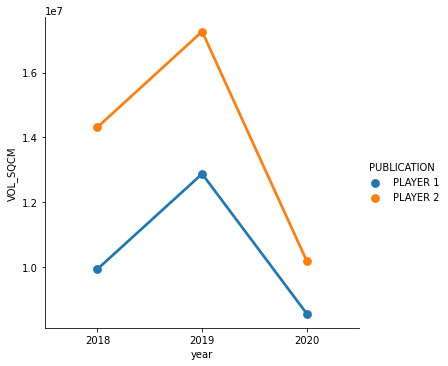

In [7]:
sns.factorplot(x='year', y='VOL_SQCM',hue='PUBLICATION',data=temp)

#### Statistical Check 

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
p1=data[data.PUBLICATION=='PLAYER 1']
p2=data[data.PUBLICATION=='PLAYER 2']

In [10]:
tdi = pd.DatetimeIndex(p1.PERIOD)
p1.set_index(tdi, inplace=True)
p1.drop(columns='PERIOD', inplace=True)
p1.index.name = 'datetimeindex'

tdi = pd.DatetimeIndex(p2.PERIOD)
p2.set_index(tdi, inplace=True)
p2.drop(columns='PERIOD', inplace=True)
p2.index.name = 'datetimeindex'

/home/abhishek/anaconda3/envs/fast2/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


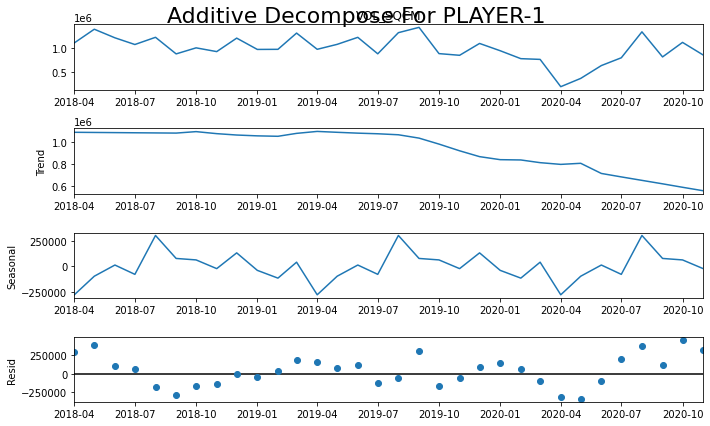

In [11]:
# Additive Decomposition
result_add = seasonal_decompose(p1['VOL_SQCM'], model='additive',extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,6)})
# result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose For PLAYER-1', fontsize=22)
plt.show()

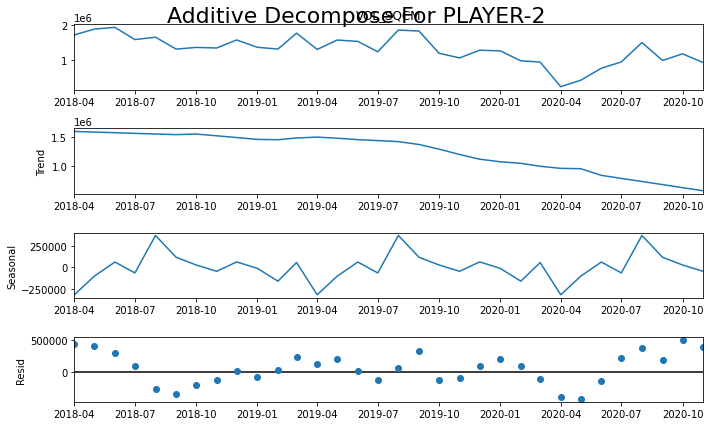

In [12]:
# Additive Decomposition
result_add = seasonal_decompose(p2['VOL_SQCM'], model='additive',extrapolate_trend='freq' )

# Plot
plt.rcParams.update({'figure.figsize': (10,6)})
# result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose For PLAYER-2', fontsize=22)
plt.show()

**Conclusion:-** Visually it seems, **From 2018 to 2019,** both have an ***upward trend*** and **from 2019 to 2020** Player-1 & Player-2 have a downward trend. The **hypothesis** is verified statistically above. And, Overall trend is ***downward*** for both Players.

### Q.2. What are the highlights in the performance of Each Player? Identify 5 Super Categories & Advertisers where Each Player is strong. Support your answers with data findngs.

In [13]:
df.head()

,PERIOD,SUPER CATEGORY,PRODUCT GROUP,ADVERTISER,PRODUCT,PUBLICATION,AD TYPE(CLR/BW),VOL_SQCM
0,Apr - 2018,Agriculture,Agri-corporate,Veg&Fruit Prom Council Kerala,Vegetable&Fruit Promo Coun (Kerala),PLAYER 2,Color,48
1,Apr - 2018,Alcoholic Drinks,Liquor,United Spirits Ltd,Mcdowells No1 Mineral Water,PLAYER 1,Black & White,32
2,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Car Rng(Ford India),PLAYER 2,Color,4021
3,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Car Rng(Ford India),PLAYER 1,Color,2612
4,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Freestyle,PLAYER 2,Color,6953


In [14]:
col=['PUBLICATION','SUPER CATEGORY']#,'ADVERTISER']

In [15]:
temp=df.groupby(col).sum('VOL_SQCM').reset_index()

####  Identifying Top-5 Super Categories for 'PLAYER 1'

In [16]:
temp[temp.PUBLICATION=='PLAYER 1'].sort_values('VOL_SQCM',ascending=False).reset_index(drop=True).head(5)

,PUBLICATION,SUPER CATEGORY,VOL_SQCM
0,PLAYER 1,Miscellaneous,9779589
1,PLAYER 1,Auto,6193382
2,PLAYER 1,Education,3393454
3,PLAYER 1,Retail,2172548
4,PLAYER 1,Services,1852436


####  Identifying Top-5 Super Categories for 'PLAYER 2'

In [17]:
temp[temp.PUBLICATION=='PLAYER 2'].sort_values('VOL_SQCM',ascending=False).reset_index(drop=True).head(5)

,PUBLICATION,SUPER CATEGORY,VOL_SQCM
0,PLAYER 2,Miscellaneous,11927716
1,PLAYER 2,Auto,8183298
2,PLAYER 2,Education,5041925
3,PLAYER 2,Retail,3748969
4,PLAYER 2,Services,3095115


####  Identifying Top-5 ADVERTISER for 'PLAYER 1'

In [18]:
col=['PUBLICATION','ADVERTISER']
temp=df.groupby(col).sum('VOL_SQCM').reset_index()

In [19]:
temp[temp.PUBLICATION=='PLAYER 1'].sort_values('VOL_SQCM',ascending=False).reset_index(drop=True).head(5)

,PUBLICATION,ADVERTISER,VOL_SQCM
0,PLAYER 1,Gen-Display Obituary,3446326
1,PLAYER 1,Dept Of Lotteries (Ker),1452613
2,PLAYER 1,Maruti Suzuki India Ltd,738986
3,PLAYER 1,Kalyan Jewellers,580503
4,PLAYER 1,Honda Motorcycle&Scooter I Ltd,518233


#### Identifying Top-5 ADVERTISER for 'PLAYER 2'

In [20]:
temp[temp.PUBLICATION=='PLAYER 2'].sort_values('VOL_SQCM',ascending=False).reset_index(drop=True).head(5)

,PUBLICATION,ADVERTISER,VOL_SQCM
0,PLAYER 2,Gen-Display Obituary,4116761
1,PLAYER 2,Dept Of Lotteries (Ker),1419067
2,PLAYER 2,Hindustan Lever Ltd,861444
3,PLAYER 2,Maruti Suzuki India Ltd,763661
4,PLAYER 2,Hyundai Motor India Ltd,538578


### Q.3. After examining the performance of both Players in FY 2020-21, what would be your recommendations to Each Player to achieve growth going forward? Establish your arguments with data points.

In [21]:
df['PERIOD'] = pd.to_datetime('01-'+df['PERIOD'])
df['year'] = pd.DatetimeIndex(df['PERIOD']).year

In [22]:
sample=df[df.year==2020]
sample.to_csv(path+'q3.csv',index=False)

In [23]:
p1=sample[sample.PUBLICATION=='PLAYER 1']
p2=sample[sample.PUBLICATION=='PLAYER 2']

In [24]:
p1.head()

,PERIOD,SUPER CATEGORY,PRODUCT GROUP,ADVERTISER,PRODUCT,PUBLICATION,AD TYPE(CLR/BW),VOL_SQCM,year
4978,2020-04-01,Banking/Finance/Investment,Banking-services & Products,The Federal Bank,Ppb PLAYER 1/Federal Bank,PLAYER 1,Color,3228,2020
4980,2020-04-01,Banking/Finance/Investment,Bonds,Kosamattam Finance Pvt Ltd,Kosamattam Finance-Ncd,PLAYER 1,Color,4285,2020
4983,2020-04-01,Banking/Finance/Investment,Loans-mortgage,Csb Bank Ltd,Csb Bank Loans Agn Gold,PLAYER 1,Color,408,2020
4984,2020-04-01,Banking/Finance/Investment,Loans-mortgage,Kollam Coop Urban Bank,Kollam Coop Loan Against Gold,PLAYER 1,Black & White,40,2020
4986,2020-04-01,Banking/Finance/Investment,Loans-mortgage,Ksfe,Ksfe Loan Against Gold,PLAYER 1,Color,404,2020


In [25]:
p1['pct_share_within_group']=(p1.VOL_SQCM/sum(p1.VOL_SQCM))*100
p2['pct_share_within_group']=(p2.VOL_SQCM/sum(p2.VOL_SQCM))*100

p1['pct_share_wrt_overall']=(p1.VOL_SQCM/sum(df.VOL_SQCM))*100
p2['pct_share_wrt_overall']=(p2.VOL_SQCM/sum(df.VOL_SQCM))*100

/home/abhishek/anaconda3/envs/fast2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/abhishek/anaconda3/envs/fast2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/abhishek/anaconda3/envs/fast2/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [26]:
col=['SUPER CATEGORY', 'PRODUCT GROUP', 'ADVERTISER', 'PRODUCT','AD TYPE(CLR/BW)', 'VOL_SQCM','pct_share_within_group']
p1_col=col+['pct_share_wrt_overall']
p2_col=col+['pct_share_wrt_overall']
p1=p1[p1_col]
p2=p2[p2_col]

In [27]:
p1.groupby(['SUPER CATEGORY']).sum().sort_values(by='pct_share_within_group',ascending=False).reset_index().to_csv(path+'q3_p1.csv',index=False)

In [28]:
p1.groupby(['SUPER CATEGORY']).sum().sort_values(by='pct_share_within_group',ascending=False).reset_index()

,SUPER CATEGORY,VOL_SQCM,pct_share_within_group,pct_share_wrt_overall
0,Miscellaneous,2918673,34.111408,3.991240
1,Auto,1780261,20.806445,2.434479
2,Education,857403,10.020726,1.172485
3,Services,538974,6.299151,0.737039
4,Banking/Finance/Investment,527321,6.162959,0.721103
5,Retail,418825,4.894934,0.572737
6,Personal Accessories,331152,3.870273,0.452845
7,Durables,260288,3.042064,0.355940
8,Food & Beverages,249141,2.911786,0.340696
9,Personal Healthcare,120605,1.409547,0.164925


In [29]:
p2.groupby(['SUPER CATEGORY']).sum().sort_values(by='pct_share_within_group',ascending=False).reset_index()

,SUPER CATEGORY,VOL_SQCM,pct_share_within_group,pct_share_wrt_overall
0,Miscellaneous,3165435,31.094103,4.328683
1,Auto,2067638,20.310431,2.827463
2,Education,1180625,11.597292,1.614486
3,Retail,696228,6.839055,0.952081
4,Services,693625,6.813486,0.948521
5,Banking/Finance/Investment,554444,5.446309,0.758193
6,Durables,421708,4.142442,0.576679
7,Personal Accessories,413045,4.057346,0.564833
8,Food & Beverages,251917,2.474583,0.344493
9,Household Products,113241,1.112368,0.154855


In [30]:
p2.groupby(['SUPER CATEGORY']).sum().sort_values(by='pct_share_within_group',ascending=False).reset_index().to_csv(path+'q3_p2.csv',index=False)

From a growth perspective, Both players have to focus on the ***SUPER CATEGORY*** where ***pct_share_within_group*** is greater than 1 strategically and tactically. However, there is a whole lot of ***SUPER CATEGORY*** where both players have minimal ***pct_share_within_group***. They need to do **Market Mix Modelling and leverage the demographical information** to target the audience. In this way, they can cut down their extra expenses and grow organically by taking strategic decisions.


### Q.4. If Player 1 has to select 10 Advertisers for having extended great support to its Publication - which 10 Advertisers would you identify for the same? Give reasons for your selection.

The simplest way to select **Top 10 Advertiser** is to ***calculate their percentage of contribution*** in a given period and ***order them in  descending order*** and select the first ten rows.

In [31]:
col=['SUPER CATEGORY', 'PRODUCT GROUP', 'ADVERTISER', 'PRODUCT','AD TYPE(CLR/BW)', 'VOL_SQCM']
sample=df[df.PUBLICATION=='PLAYER 1'][col]

In [32]:
sample.head()

,SUPER CATEGORY,PRODUCT GROUP,ADVERTISER,PRODUCT,AD TYPE(CLR/BW),VOL_SQCM
1,Alcoholic Drinks,Liquor,United Spirits Ltd,Mcdowells No1 Mineral Water,Black & White,32
3,Auto,Auto-cars,Ford India Pvt Ltd,Ford Car Rng(Ford India),Color,2612
6,Auto,Auto-cars,Honda Cars India Ltd,Honda Cars,Color,1649
9,Auto,Auto-cars,Hyundai Motor India Ltd,Hyundai Car Range,Color,8052
12,Auto,Auto-cars,Hyundai Motor India Ltd,Hyundai Elite I20,Color,5871


In [33]:
t=sample.groupby(['ADVERTISER']).sum('VOL_SQCM').reset_index()

In [34]:
t['pct_share']=(t.VOL_SQCM/sum(t.VOL_SQCM))*100

In [35]:
t.sort_values(by='pct_share',ascending=False).reset_index(drop=True).head(10)

,ADVERTISER,VOL_SQCM,pct_share
0,Gen-Display Obituary,3446326,10.988549
1,Dept Of Lotteries (Ker),1452613,4.631631
2,Maruti Suzuki India Ltd,738986,2.356244
3,Kalyan Jewellers,580503,1.850923
4,Honda Motorcycle&Scooter I Ltd,518233,1.652377
5,Hyundai Motor India Ltd,479959,1.530341
6,Logical Steps Interactive Solutions Pvt,475343,1.515623
7,Hindustan Lever Ltd,468510,1.493836
8,Govt Of Kerala,443505,1.414108
9,Renault India,441020,1.406184


In [36]:
t.sort_values(by='pct_share',ascending=False).reset_index(drop=True).head(10).to_csv(path+'q4_data.csv',index=False)